In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Objectif: Prédire la valeur du prix des maisons en utlisant les données**

In [2]:
data1 = pd.read_csv('C:/Users/ndeye anta ka cisse/Documents/boston_house_prices.csv')

In [3]:
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [29]:
#Creons notre target
target = data1['MEDV'] 

In [30]:
#Calcule de corr 
col_matrix = data1.corr().round(2)
col_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<Axes: >

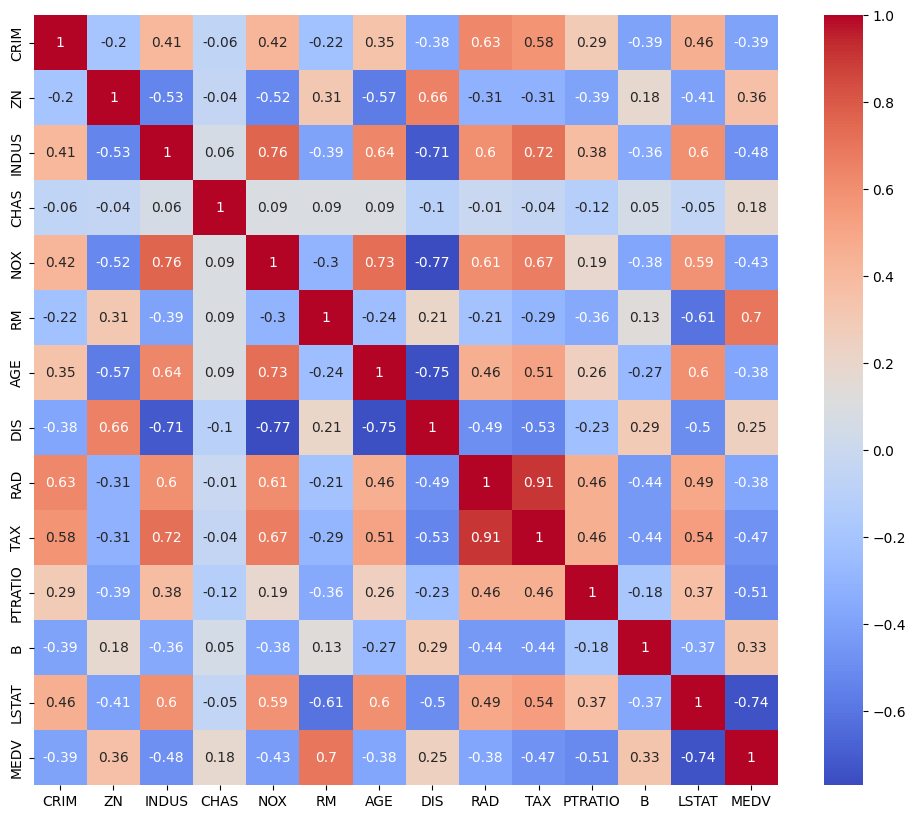

In [31]:
#Trace la matrice de corrélation avec heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data=col_matrix,annot = True, cmap="coolwarm")

Interprétation: D'après la matrixe de correlation nous pouvons observer que MEDV est fortement corrélée avec RM (Corrélation positive) et LSTAT (Corr fortement negative)

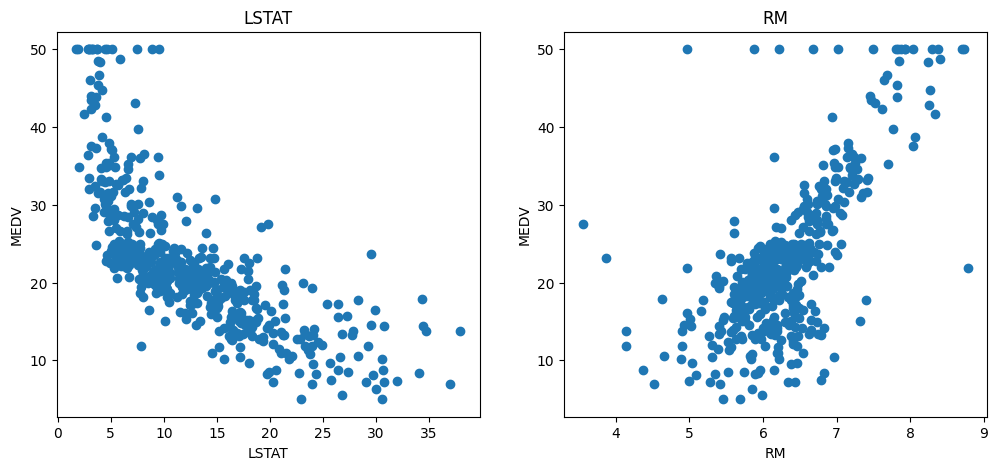

In [32]:
#Nuage de point des variables dépendantes:
plt.figure(figsize=(12, 5))
features = ['LSTAT', 'RM']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
  

**Préparation pour l'entrainement**

In [33]:
#
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

In [34]:
Y,X

(0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: MEDV, Length: 506, dtype: float64,
      LSTAT     RM
 0     4.98  6.575
 1     9.14  6.421
 2     4.03  7.185
 3     2.94  6.998
 4     5.33  7.147
 ..     ...    ...
 501   9.67  6.593
 502   9.08  6.120
 503   5.64  6.976
 504   6.48  6.794
 505   7.88  6.030
 
 [506 rows x 2 columns])

# Fractionnement des données en des données d'entrainement et des données de test


In [35]:
from sklearn.model_selection import train_test_split
#Divisons l'ensemble de données en un dataset d'entraiment et un dataset de test avec une répartition de 70% vs 30% (vous pouvez faire also 80%)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


In [36]:
#Mise à échelle des données 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()


In [37]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Implémentation du modèle**


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
LM = LinearRegression()

# Entrainement du model


In [40]:
LM.fit(X_train, Y_train)

LinearRegression()

# Evaluation du modèle 

In [41]:
#Evaluation du modèle pour l'ensemble d'entrainemnt
from sklearn.metrics import mean_squared_error, r2_score
y_train_preict = LM.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_preict )))
r2 = r2_score(Y_train, y_train_preict)

In [42]:
print("La performance du modèle pour les données d'entrainement")
print(f"L'erreur RMSE est {rmse}")
print(f"R²: {r2}")

La performance du modèle pour les données d'entrainement
L'erreur RMSE est 5.295854554553106
R²: 0.6358519563974279


In [43]:
y_test_preict = LM.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_preict )))
r2 = r2_score(Y_test, y_test_preict)
print("La performance du modèle pour les données d'entrainement")
print(f"L'erreur RMSE est {rmse}")
print(f"R²: {r2}")

La performance du modèle pour les données d'entrainement
L'erreur RMSE est 6.044926081535136
R²: 0.6318650681832954


In [21]:
#Recherche : Pivot wide; pivot-longe; reshape(); merge

In [ ]:
nouvelle_donnee = np.array([[7.147, 5.33]])
nouvelle_donnee_scaled = scaler.transform(nouvelle_donnee)  # transformation avant prédiction
prediction = LM.predict(nouvelle_donnee_scaled)

# Affichage
print(f"Le prix prédit est : {prediction[0]:.2f}")

In [ ]:
#Predict vs Real
plt.figure(figsize=(7,5))
ax1 = sns.distplot(Y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_test_preict,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [ ]:
#Evaluation du model
acc = 